In [80]:
import os
import sys
import glob
from pathlib import Path, PurePath
import numpy as np
import pandas as pd

path = Path.cwd()
parent_path = path.parents[1]
sys.path.append(str(PurePath(parent_path, 'neuroformer')))
sys.path.append('neuroformer')
sys.path.append('.')
sys.path.append('../')

from neuroformer.prepare_data import DataLinks
ds = "HippocampusPos"
DATA_POINTERS = getattr(DataLinks, ds)


if not os.path.exists(DATA_POINTERS['DIRECTORY']):
    print("Downloading data...")
    import gdown
    url = DATA_POINTERS['url']
    gdown.download_folder(id=url, quiet=False, use_cookies=False, output=DATA_POINTERS['DIRECTORY'])

In [81]:
# import numpy as np
# import matplotlib.pyplot as plt
# import h5py
# import scipy.io as sio

# data_dir = "./data/cebra/hippocampus_pos"
# filename = "Achilles_10252013_sessInfo.mat"
# filepath = os.path.join(data_dir, filename)

# with h5py.File(filepath, 'r') as f:
    

In [93]:
array_neural_pth = "./data/cebra/hippocampus_pos/array_neural.npy"
array_pos_pth ="./data/cebra/hippocampus_pos/array_pos.npy"

array_neural = np.load(array_neural_pth)
array_pos = np.load(array_pos_pth)

arr_pos = array_pos

# Get N
N = arr_pos.shape[0]

# Define time step
time_step = 0.025

# Create Time array
Time = np.arange(0, N * time_step, time_step)

# Convert arrays to DataFrame
df = pd.DataFrame(arr_pos, columns=['Position', 'Dir_Right', 'Dir_Left'])

# Add Time column to DataFrame
df['Time'] = Time

df['Trial'] = 1

save_path = "./data/cebra/hippocampus_pos/"
df.to_csv(save_path + "hippocampus_pos_cerba.csv", index=False)

N, M = array_neural.shape

# Define time step
time_step = 0.025

# Initialize lists to store ID and Time
ID = []
Time = []

# Go through each cell in the array
for i in range(N):  # for each row
    for j in range(M):  # for each column
        # Add (ID, Time) pair for each firing
        for _ in range(int(array_neural[i, j])):
            ID.append(j+1)
            Time.append(i * time_step)

# Convert lists to DataFrame
df = pd.DataFrame({'ID': ID, 'Time': Time})
print(df)

df['Trial'] = 1

df.to_csv(save_path + "hippocampus_neural_cerba.csv", index=False)

       ID     Time
0      30    0.000
1      43    0.000
2      44    0.000
3      52    0.000
4      55    0.000
...    ..      ...
53466  52  254.425
53467  52  254.425
53468  87  254.425
53469  99  254.425
53470  99  254.425

[53471 rows x 2 columns]


In [83]:
df_behavior = pd.read_csv("./data/cebra/hippocampus_pos/Achilles_Behavior.csv")
df_spikes = pd.read_csv("./data/cebra/hippocampus_pos/Achilles_Spikes.csv")

In [84]:
len(df_behavior), len(arr_pos)

(10028, 10178)

In [85]:
df_behavior

,locations,locations_left,locations_right,Cumtime,Trial,Time
0,0.005800,-0.248981,-0.193828,74.535712,14,0.000000
1,0.011089,-0.243890,-0.188825,74.561312,14,0.025600
2,0.014782,-0.240336,-0.188487,74.586912,14,0.051200
3,0.014778,-0.240339,-0.188373,74.612512,14,0.076800
4,0.014487,-0.240620,-0.178676,74.638112,14,0.102400
...,...,...,...,...,...,...
10023,0.048748,-0.207643,-0.299378,2026.708114,84,1497.287586
10024,0.036009,-0.219905,-0.305062,2026.733713,84,1497.313186
10025,0.026005,-0.229534,-0.301458,2026.759313,84,1497.338786
10026,0.016944,-0.238255,-0.293250,2026.784913,84,1497.364385


In [86]:
df_behavior.iloc[2]

locations           0.014782
locations_left     -0.240336
locations_right    -0.188487
Cumtime            74.586912
Trial              14.000000
Time                0.051200
Name: 2, dtype: float64

In [87]:
round(0.01478173, 6)

0.014782

In [88]:
arr_pos.shape

(10178, 3)

In [89]:
arr_pos_rounded[:, 0][:20]

array([0.011089, 0.014782, 0.014778, 0.014487, 0.014328, 0.011277,
       0.006989, 0.004791, 0.007299, 0.005658, 0.004636, 0.005627,
       0.007492, 0.0056  , 0.003612, 0.001066, 0.004434, 0.005428,
       0.010558, 0.015918], dtype=float32)

In [90]:
df_behavior['locations'].iloc[:20]

0     0.005800
1     0.011089
2     0.014782
3     0.014778
4     0.014487
5     0.014328
6     0.011277
7     0.004791
8     0.007299
9     0.005658
10    0.005627
11    0.007492
12    0.005600
13    0.003612
14    0.001066
15    0.004434
16    0.005428
17    0.010559
18    0.015918
19    0.019666
Name: locations, dtype: float64

In [91]:
arr_pos_rounded = np.round(arr_pos, 6)
df_behavior['locations'] = df_behavior['locations'].apply(lambda x: round(x, 6)) 

In [92]:
# keep only matching values
df_behavior[df_behavior['locations'].isin(arr_pos_rounded[:, 0])]

,locations,locations_left,locations_right,Cumtime,Trial,Time
6032,0.34375,0.076303,-0.20009,1136.292014,84,606.871487


In [79]:
df_behavior

,locations,locations_left,locations_right,Cumtime,Trial,Time
6032,0.34375,0.076303,-0.20009,1136.292014,84,606.871487


In [51]:
arr_pos_rounded[:, 0]

array([0.011089, 0.014782, 0.014778, ..., 0.026005, 0.016944, 0.005945],
      dtype=float32)

In [50]:
df_behavior

,locations,locations_left,locations_right,Cumtime,Trial,Time


In [36]:
pos_cebra = arr_pos[:, 0]
pos = df_behavior['locations']
counter_cebra = 0
counter = 0
matching_indexes = []
while counter_cebra < len(pos_cebra) - 1:
    val_1 = round(pos_cebra[counter_cebra], 6)
    val_2 = round(pos[counter], 6)
    while abs(val_1 - val_2) > 0.00001:
        print(f"val_1: {val_1}, val_2: {val_2}")
        counter += 1
        val_2 = round(pos[counter], 6)
    counter_cebra += 1
    matching_indexes.append(counter)

val_1: 0.011088999919593334, val_2: 0.0058
val_1: 0.014782000333070755, val_2: 0.011089
val_1: 0.014487000182271004, val_2: 0.014782
val_1: 0.014487000182271004, val_2: 0.014778
val_1: 0.014328000135719776, val_2: 0.014487
val_1: 0.011277000419795513, val_2: 0.014328
val_1: 0.006988999899476767, val_2: 0.011277
val_1: 0.006988999899476767, val_2: 0.004791
val_1: 0.006988999899476767, val_2: 0.007299
val_1: 0.006988999899476767, val_2: 0.005658
val_1: 0.006988999899476767, val_2: 0.005627
val_1: 0.006988999899476767, val_2: 0.007492
val_1: 0.006988999899476767, val_2: 0.0056
val_1: 0.006988999899476767, val_2: 0.003612
val_1: 0.006988999899476767, val_2: 0.001066
val_1: 0.006988999899476767, val_2: 0.004434
val_1: 0.006988999899476767, val_2: 0.005428
val_1: 0.006988999899476767, val_2: 0.010559
val_1: 0.006988999899476767, val_2: 0.015918
val_1: 0.006988999899476767, val_2: 0.019666
val_1: 0.006988999899476767, val_2: 0.02331
val_1: 0.006988999899476767, val_2: 0.02867
val_1: 0.0069889

KeyError: 10028

In [37]:
matching_indexes

[1, 2, 2, 4, 5, 6]

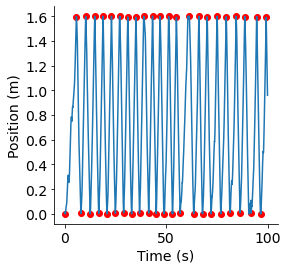

In [128]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy.io as sio

data_dir = "./data/cebra/hippocampus_pos"
filename = "Achilles_10252013_sessInfo.mat"
filepath = os.path.join(data_dir, filename)

# with h5py.File(filepath,'r') as f:
#     tlfp = (f['TLFP'][()])
#     tph = f['Tph'][()]

with h5py.File(filepath, 'r') as f:
    ## load spike info
    spikes_times = np.array(f['sessInfo']['Spikes']['SpikeTimes'])[0]
    spikes_cells = np.array(f['sessInfo']['Spikes']['SpikeIDs'])[0]
    pyr_cells = np.array(f['sessInfo']['Spikes']['PyrIDs'])[0]
    
    ## load location info ## all in maze
    locations_2d = np.array(f['sessInfo']['Position']['TwoDLocation']).T
    locations = np.array(f['sessInfo']['Position']['OneDLocation'])[0]
    locations_times = np.array(f['sessInfo']['Position']['TimeStamps'])[:,0]
    # linspeed_raw = np.array(f['sessInfo']['Position']['linspeed_raw'])[0]
    # linspeed_sm = np.array(f['sessInfo']['Position']['linspeed_sm'])[0]
    
    ## load maze epoch range
    maze_epoch = np.array(f['sessInfo']['Epochs']['MazeEpoch'])[:,0]
    wake_epoch = np.array(f['sessInfo']['Epochs']['Wake'])
    
time_in_maze = ((spikes_times >= maze_epoch[0])*(spikes_times <= maze_epoch[1]))

spikes_times = spikes_times[time_in_maze]
spikes_cells = spikes_cells[time_in_maze]

cell_mask = np.isin(spikes_cells, pyr_cells)
spikes_times = spikes_times[cell_mask]
spikes_cells = spikes_cells[cell_mask]

bin_size = 25 ## change bin size to whatever you want here

binned_spike_times = np.array(np.floor(spikes_times*1000/bin_size), dtype='int')
spike_by_neuron = np.zeros((binned_spike_times.max() - binned_spike_times.min()+1, pyr_cells.shape[0]))

cell_dic = {}
for i,v in enumerate(pyr_cells):
    cell_dic[int(v)] = i
    
for it in range(binned_spike_times.shape[0]):
    spike_by_neuron[binned_spike_times[it]-binned_spike_times.min(), cell_dic[spikes_cells[it]]] += 1
    
tph_binned_time = np.array(np.floor((np.arange(binned_spike_times.min(),binned_spike_times.max()+1)*bin_size/1000)*1250), dtype='int')
# tph_vec = tph[0][tph_binned_time]
# tlpf_vec = tlfp[0][tph_binned_time]

binned_locations_times = np.array(np.floor(locations_times*1000/bin_size), dtype='int')
# non_na = (~np.isnan(linspeed_raw))
# binned_locations_times = binned_locations_times[non_na]
# locations = locations[non_na]
# linspeed_raw = linspeed_raw[non_na]
# linspeed_sm = linspeed_sm[non_na]
# locations_2d = locations_2d[non_na]

locations_vec = np.zeros(spike_by_neuron.shape[0])+np.nan
linspeed_vec = np.zeros(spike_by_neuron.shape[0])+np.nan

for it in range(len(binned_locations_times)):
    locations_vec[binned_locations_times[it] - binned_spike_times.min()] = locations[it]
    # linspeed_vec[binned_locations_times[it] - binned_spike_times.min()] = linspeed_raw[it]
    
spike_by_neuron_use = spike_by_neuron[~np.isnan(locations_vec)]
locations_vec = locations_vec[~np.isnan(locations_vec)]
# tph_vec = tph_vec[~np.isnan(linspeed_vec)]
# tlpf_vec = tlpf_vec[~np.isnan(linspeed_vec)]
linspeed_vec = linspeed_vec[~np.isnan(linspeed_vec)]

def rolling_max(x):
    idx_split = []
    
    for idx, val in enumerate(x):
        if val < 0.025 or val > 1.575:
            tmp = x[max(idx-20,0):min(idx+20,len(x))]
            if val == min(tmp) or val==max(tmp):
                idx_split.append(idx)
    idx_split = np.array(idx_split)
    return idx_split

idx_split = rolling_max(locations_vec)
idx_split = np.delete(idx_split, np.where(np.abs(np.diff(locations_vec[idx_split])) < 1)[0])

from matplotlib.ticker import FormatStrFormatter
## check if you have removed all the stop stages

fig = plt.figure(figsize=(4,4))
ax1 = plt.subplot(111)
fsz = 14
ll = 4000
plt.plot(locations_vec[:ll])
ax1.set_xlabel('Time (s)',fontsize=fsz,fontweight='normal')
ax1.set_ylabel('Position (m)',fontsize=fsz,fontweight='normal')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
plt.setp(ax1.get_xticklabels(), fontsize=fsz)
plt.setp(ax1.get_yticklabels(), fontsize=fsz)
ax1.set_xticks((0,2000,4000,6000))
ax1.set_xticklabels((0,50,100,150))
#ax1.set_xticks((0,2000,4000,6000,8000,10000))
#ax1.set_xticklabels((0,50,100,150,200,250))
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.scatter(idx_split[idx_split<ll], locations_vec[idx_split[idx_split<ll]], c='red')

## save data
sio.savemat(os.path.join(data_dir, "Achilles_data.mat"),
            {'trial':idx_split, 'spikes':spike_by_neuron_use, 'loc':locations_vec})

In [130]:
with h5py.File(filepath, 'r') as f:
    f['sessInfo']['Position']

In [6]:
locations_vec.shape
linspeed_vec.shape

(0,)

In [4]:
print(f"spike_times: {spikes_times.shape}")
print(f"spike_cells: {spikes_cells.shape}")
print(f"pyr_cells: {pyr_cells.shape}")
print(f"locations_2d: {locations_2d.shape}")
print(f"locations: {locations.shape}")
print(f"locations_times: {locations_times.shape}")

spike_times: (270829,)
spike_cells: (270829,)
pyr_cells: (120,)
locations_2d: (80762, 2)
locations: (80762,)
locations_times: (80762,)


In [5]:
def rolling_max(x):
    idx_split = []
    
    for idx, val in enumerate(x):
        if val < 0.025 or val > 1.575:
            tmp = x[max(idx-20,0):min(idx+20,len(x))]
            if val == min(tmp) or val==max(tmp):
                idx_split.append(idx)
    idx_split = np.array(idx_split)
    return idx_split

In [6]:
idx_split = rolling_max(locations)

In [7]:
idx_split = np.delete(idx_split, np.where(np.abs(np.diff(locations[idx_split])) < 1)[0])

In [8]:
idx_split

array([ 4755,  5361,  6389,  6984,  7691,  8245,  9324,  9755, 10705,
       11233, 11858, 12485, 13185, 13791, 14894, 15350, 16182, 16675,
       17300, 17868, 18541, 19013, 19584, 19989, 20794, 21080, 21881,
       22291, 23365, 23785, 24656, 25207, 26577, 26777, 28695, 29184,
       29786, 30248, 30893, 31359, 32399, 32780, 33454, 33847, 34781,
       35170, 35763, 36198, 37204, 37316, 38011, 38464, 39037, 39469,
       39961, 42395, 42528, 43372, 44480, 45066, 45895, 46637, 48766,
       49757, 50258, 51001, 51911, 52512, 54669, 55030, 55946, 56434,
       57568, 58497, 59576, 65496, 67387, 67691, 69397, 74265, 74540,
       77907, 80438, 80614])

In [9]:
spike_id = spikes_cells
spike_time = spikes_times
location_data = locations

In [10]:
# Preallocate lists
ID = []
Trial = []
Cumtime = []
Time_Since_End = []

# Initialize end time of previous trial
prev_end_time = 0

# Loop over idx_split
for i in range(len(idx_split) - 1):
    start, end = idx_split[i], idx_split[i+1]
    ID.extend(spike_id[start:end])
    Cumtime.extend(spike_time[start:end])
    Time_Since_End.extend(spike_time[start:end] - prev_end_time)
    Trial.extend([i+1]*(end - start))

    # Update end time of previous trial
    prev_end_time = spike_time[end - 1]

# If there's a remaining section after the last split index
if idx_split[-1] != len(spike_id):
    start = idx_split[-1]
    ID.extend(spike_id[start:])
    Cumtime.extend(spike_time[start:])
    Time_Since_End.extend(spike_time[start:] - prev_end_time)
    Trial.extend([len(idx_split)]*(len(spike_id) - start))

# Convert

In [11]:
import pandas as pd

# Create DataFrame
df = pd.DataFrame({
    'ID': ID,
    'Trial': Trial,
    'Time': Time_Since_End,
    'Cumtime': Cumtime
})


df.to_csv("./data/cebra/hippocampus_pos/Achilles_Spikes.csv", index=False)

In [13]:
import pandas as pd

behavior = pd.DataFrame({'locations':locations.flatten(),
                         'locations_left': locations_2d[:,0].flatten(),
                         'locations_right': locations_2d[:,1].flatten(), 
                         'Cumtime':locations_times.flatten()})

In [14]:
# only keep times that are in both behavior and df

min_time = max(df['Cumtime'].min(), behavior['Cumtime'].min())
max_time = min(df['Cumtime'].max(), behavior['Cumtime'].max())

df = df[(df['Cumtime'] >= min_time) & (df['Cumtime'] <= max_time)]
behavior = behavior[(behavior['Cumtime'] > min_time) & (behavior['Cumtime'] < max_time)].dropna().reset_index(drop=True)


In [15]:
# Calculate the trial start and end times in df
trial_start_times = df.groupby('Trial')['Cumtime'].min()
trial_end_times = df.groupby('Trial')['Cumtime'].max()
trial_index = trial_start_times.index

# Initialize a 'Trial' column in behavior with default value of 0
behavior['Trial'] = 0

# Loop over trial start and end times
counter = 0
for i, (trial, start_time, end_time) in enumerate(zip(trial_index, trial_start_times, trial_end_times), start=1):
    # All times in behavior that are within this start and end time belong to this trial
    behavior.loc[(behavior['Cumtime'] >= start_time) & (behavior['Cumtime'] <= end_time), 'Trial'] = i
    df.loc[(df['Cumtime'] >= start_time) & (df['Cumtime'] <= end_time), 'Trial'] = i

print(behavior)

min_time = min(df['Cumtime'].min(), behavior['Cumtime'].min())
max_time = max(df['Cumtime'].max(), behavior['Cumtime'].max())

df['Cumtime'] = df['Cumtime'] - min_time
behavior['Cumtime'] = behavior['Cumtime'] - min_time

common_trials = np.intersect1d(df['Trial'].unique(), behavior['Trial'].unique())
df = df[df['Trial'].isin(common_trials)]
behavior = behavior[behavior['Trial'].isin(common_trials)]

       locations  locations_left  locations_right       Cumtime  Trial
0       0.005800       -0.248981        -0.193828  18190.936412     14
1       0.011089       -0.243890        -0.188825  18190.962012     14
2       0.014782       -0.240336        -0.188487  18190.987612     14
3       0.014778       -0.240339        -0.188373  18191.013212     14
4       0.014487       -0.240620        -0.178676  18191.038812     14
...          ...             ...              ...           ...    ...
10331   0.048748       -0.207643        -0.299378  20143.108814     84
10332   0.036009       -0.219905        -0.305062  20143.134413     84
10333   0.026005       -0.229534        -0.301458  20143.160013     84
10334   0.016944       -0.238255        -0.293250  20143.185613     84
10335   0.005945       -0.248842        -0.284875  20143.211213     84

[10336 rows x 5 columns]


In [16]:
def trial_time(df):
    trials = df['Trial'].unique()
    min_trial = df['Trial'].min()
    for trial in trials:
        if trial == min_trial:
            continue
        df['Time'] = 0
        df.loc[df['Trial'] == trial, 'Time'] = df.loc[df['Trial'] == trial, 'Cumtime'] - df.loc[df['Trial'] == trial - 1, 'Cumtime'].max()
    return df

df = trial_time(df)
behavior = trial_time(behavior)

In [17]:
from neuroformer.SpikeVidUtils import make_intervals

window = 0.025
time_col = 'Cumtime'
behavior['Interval'] = make_intervals(behavior, window=window, col=time_col)
df['Interval'] = make_intervals(df, window=window, col=time_col)

# only keep intervals that intersect
common_intervals = np.intersect1d(df['Interval'].unique(), behavior['Interval'].unique())
df = df[df['Interval'].isin(common_intervals)]
behavior = behavior[behavior['Interval'].isin(common_intervals)]

def start_trial_time(df):
    trials = df['Trial'].unique()
    df['Time'] = df['Cumtime']
    for trial in trials:
        min_time = df.loc[df['Trial'] == trial, 'Cumtime'].min()
        df.loc[df['Trial'] == trial, 'Time'] = df.loc[df['Trial'] == trial, 'Cumtime'] - min_time
    return df

df.drop(columns=['Interval'], inplace=True)
behavior.drop(columns=['Interval'], inplace=True)
df = start_trial_time(df)
behavior = start_trial_time(behavior)

In [18]:
df

,ID,Trial,Time,Cumtime
9312,614.0,14,0.00000,74.52685
9313,603.0,14,0.01295,74.53980
9314,1034.0,14,0.01410,74.54095
9315,535.0,14,0.02785,74.55470
9316,614.0,14,0.03310,74.55995
...,...,...,...,...
265493,305.0,84,1497.40850,2026.81145
265494,614.0,84,1497.41135,2026.81430
265495,1019.0,84,1497.41460,2026.81755
265496,1040.0,84,1497.41720,2026.82015


In [19]:
behavior.reset_index(drop=True, inplace=True)
df.reset_index(drop=True, inplace=True)

In [20]:
# save data
df.to_csv("./data/cebra/hippocampus_pos/Achilles_Spikes.csv", index=False)
behavior.to_csv("./data/cebra/hippocampus_pos/Achilles_Behavior.csv", index=False)